In [63]:
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import math

In [20]:
df = pd.read_csv('bottle.csv')


# Part A: Data Cleaning & Exploratory Analysis

In [21]:
df.shape

(864863, 74)

In [22]:
df = df.loc[:,['T_degC', 'Salnty', 'STheta']]

In [23]:
df.dropna(subset=["T_degC", "Salnty", "STheta"], inplace=True)

In [24]:
df.shape

(812174, 3)

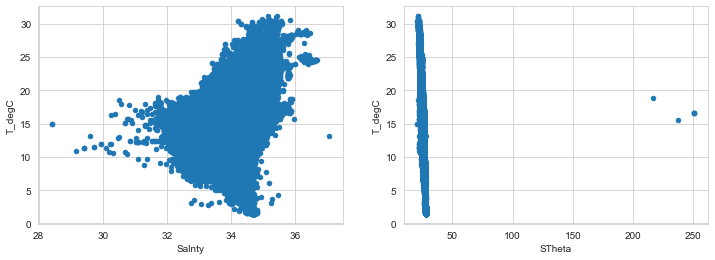

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

df.plot(x='Salnty', y='T_degC', ax=ax[0], kind='scatter')
df.plot(x='STheta', y='T_degC', ax=ax[1], kind='scatter')

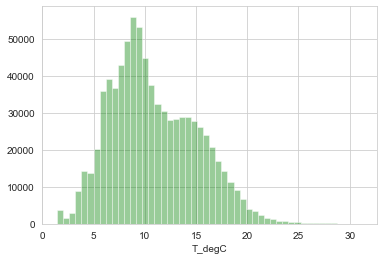

In [35]:
sns.set_style('whitegrid')
sns.distplot(df['T_degC'],kde = False, color ='green')

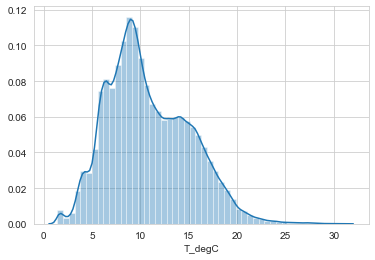

In [34]:
sns.distplot(df['T_degC'])

In [36]:
clean_df = df[df['STheta'] < 200]

In [37]:
clean_df.shape

(812168, 3)

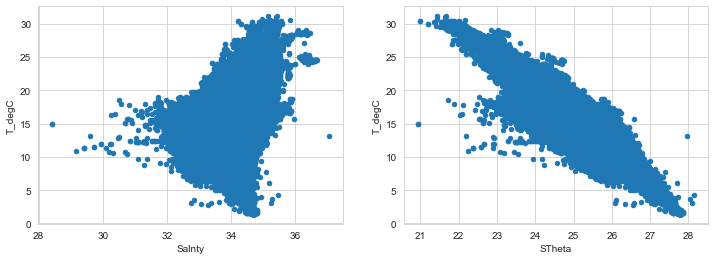

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

clean_df.plot(x='Salnty', y='T_degC', ax=ax[0], kind='scatter')
clean_df.plot(x='STheta', y='T_degC', ax=ax[1], kind='scatter')

# Part B: Train & Test Split:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    clean_df[["Salnty", "STheta"]],
    clean_df["T_degC"], test_size=.2,
    random_state=49)

# Part C: Linear Regression Using Normal Equation - Coded In Python

In [59]:
X_new_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_new_test = np.c_[np.ones((len(X_test), 1)), X_test]
theta_best = np.linalg.inv(X_new_train.T.dot(X_new_train)).dot(X_new_train.T).dot(y_train)
print("Coefficients: ", theta_best)
X_new_train

Coefficients:  [35.69668196  3.10821727 -5.03676129]


array([[ 1.     , 33.377  , 24.713  ],
       [ 1.     , 34.286  , 27.144  ],
       [ 1.     , 33.574  , 25.598  ],
       ...,
       [ 1.     , 34.27   , 26.956  ],
       [ 1.     , 34.09   , 26.445  ],
       [ 1.     , 33.9707 , 26.49129]])

In [60]:
y_predict_train = np.dot(X_new_train,theta_best)
y_predict_test = np.dot(X_new_test,theta_best)

In [61]:
y_predict_train

array([14.9661682 ,  5.54717102, 11.12095327, ...,  6.44435066,
        8.45865657,  7.85469457])

In [62]:
y_predict_test

array([11.65158675, 10.85674673,  9.28372723, ...,  7.83140062,
       11.73512008, 17.32738258])

In [66]:
rmse_holdout = math.sqrt(sum((y_predict_test - y_test)**2) / (len(y_predict_test)-1))
print(rmse_holdout)

rsq_test = 1 - sum((y_predict_test - y_test)**2) / sum((y_test - np.mean(y_test))**2)
print(rsq_test)

0.48300667052172763
0.9869485895195463


In [80]:
variance = ((y_test - y_test.mean())**2).mean()

print("Test  Variance: {}".format(round(variance, 3)))

Test  Variance: 17.875


In [79]:
var_explained = variance - rmse_test**2

print("Test  Variance Explained: {}".format(round(var_explained, 3)))

Test  Variance Explained: 17.642


Scatterplot between Y_Actual and Y_Predicted for the TEST data


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted')

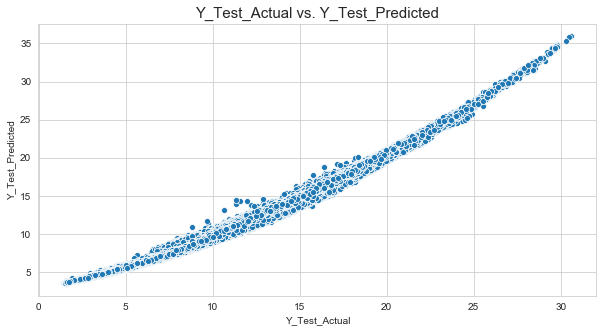

In [71]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(y_test,y_predict_test)
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted", fontsize = 15)

# Part D: Using sklearn API 

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Coefficients: \n', lin_reg.coef_)
y_predict_train_sklearn = lin_reg.predict(X_train)
y_predict_test_sklearn = lin_reg.predict(X_test)




Coefficients: 
 [ 3.10821727 -5.03676129]


In [75]:
print("Holdout mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_predict_test_sklearn))
print("Holdout explained variance: %.2f"
      % metrics.explained_variance_score(y_test, y_predict_test_sklearn))
print("Holdout r-squared: %.2f" % metrics.r2_score(y_test,
                                                   y_predict_test_sklearn))

Holdout mean squared error: 0.23
Holdout explained variance: 0.99
Holdout r-squared: 0.99


Scatterplot between Y_Actual and Y_Predicted for the TEST data for the Sklearn method


Text(0.5, 1.0, 'Y_Test_Actual vs. Y_Test_Predicted')

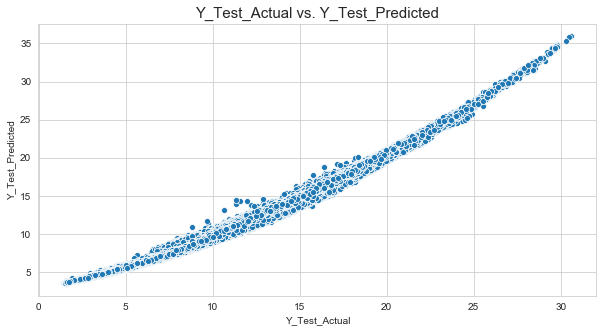

In [78]:
print("Scatterplot between Y_Actual and Y_Predicted for the TEST data for the Sklearn method")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(y_test,y_predict_test_sklearn)
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted", fontsize = 15)

# Part E: Conceptual Questions

Why is it important to have a test set?


We need to have a test set in order to see how well our predictive model generalises or to evaluate the performamce of the model by letting the model make the predictions over the test set. once we see that our model is performing well over the test set, we can get it deployed to production.

If the normal equation always provides a solution, when would we not want to use it?


We do not want to use the normal equation because of its  numerical complexity which involves invertion of the matrix which is a computationally expensive operation and it depends on the implementation. The normal equation does not scale up well if more features are included because when we double the number of features, the time for the computation is increased by 2³ = 8 times.

 How might we improve the fit of our models from Part C & D?

    Note: There are lots of possible answers to this section - just describe one in detail. 

Normalise/Scaling our data : We can use the standard scalar from SKlearn which subtracts each observation value from its mean divided by the standard deviation or computes the Z score of each observation. Standard scalar standardizes or centres all the features to a mean of '0' and scales them to unit variance thereby bringing all of the features under one scale. Thereby by making the individual features look like Guassian data or standard normally distributed data , we can easily improve the linear regression fit.


Some of the other ways to improve the fit is by Regularisation of the features in order to reduce possible overfitting and Do feature engineering by remove multi-collinearity.

As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff.
Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

Prediction errors in our linear regression models can be of 2 types - Bias and variance. Proper understanding of these prediction errors is required to build accurate models and also to avoid overfitting and underfitting of our models.

Bias is defined as the difference between the average/mean value of all predictions that our model has made and the correct/accurate value that our model is required to predict. ML Models that come up with high bias oversimplify or over-generalize the model and they pay very little attention to the details in the training data. Models with high bias always perform poorly and they lead to high error on test and training dataset.


Variance is defined as the variability of models prediction . Model with high variance do not generalize well on the newly exposed data and pay a lot of attention to the minute details in the training data and thats why they do not perform well on the data which it hasn’t seen before. So such models with high variance perform very well on training dataset but end up with very high error rates on holdout/test dataset.


In a linear regression model, how might we reduce bias?

underfit models or models with high bias fail to capture the underlying complex patterns of the data. We can reduce the bias by increasing the number of features or perform feature engineering inorder to add more meaningful factors to the data. Thereby by making the model more complex we can easily reduce the bias by training the model so that it learns the underlying patterns of data.

In a linear regression model, how might we reduce variance? 

we can reduce high variance by reducing the number of features in the dataset using various dimensionality
reduction techniques like PCA etc
Increasing the size of the training set can also help the model generalize.
Regularization(L1 OR L2) can also be used as an effective strategy to overcome the overfitting problem.